<a href="https://colab.research.google.com/github/Chayanika-Devi/test/blob/main/Face_landmark_Detection_Test_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
print(cv2.__version__)

4.10.0


In [2]:
# used for accessing url to download files
import urllib.request as urlreq

# used to access local directory
import os

# used to plot our images
import matplotlib.pyplot as plt

# used to change image size
from pylab import rcParams

In [31]:
# save picture's url in pics_url variable
pics_url = "/content/test.jpg"

# save picture's name as pic
pic = "test.jpg"

# chech if picture is in working directory
if (pic in os.listdir(os.curdir)):
    print("Picture exists")
else:
    # download picture from url and save locally as image.jpg
    urlreq.urlretrieve(pics_url, pic)
    print("Picture downloaded")

Picture exists


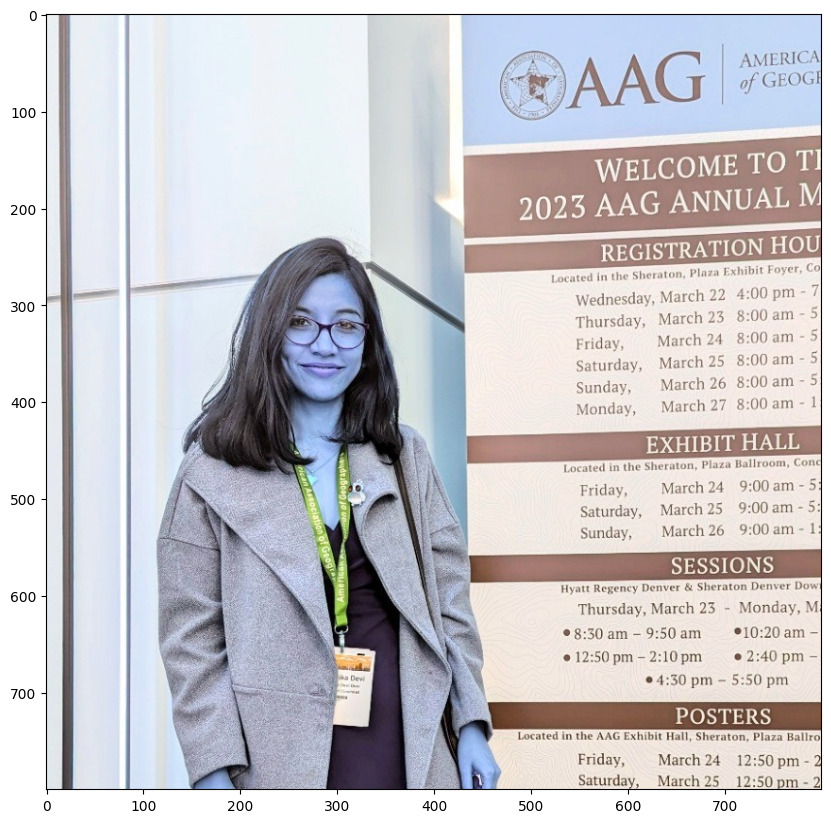

In [32]:
# read image with openCV
image = cv2.imread(pic)

# plot image with matplotlib package
plt.imshow(image)

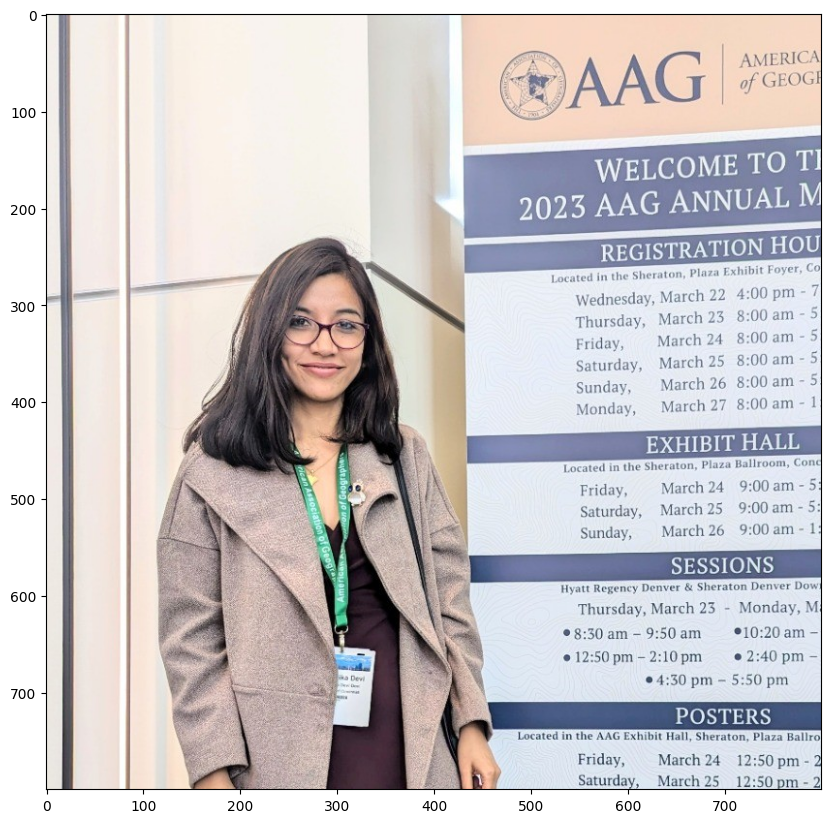

In [33]:
# convert image to RGB colour
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plot image with matplotlib package
plt.imshow(image_rgb)

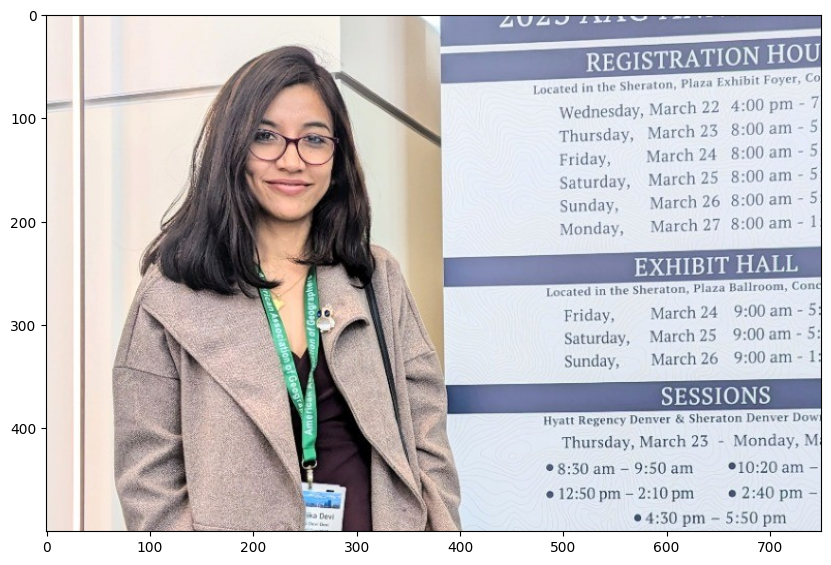

In [34]:
# set dimension for cropping image
x, y, width, depth = 50, 200, 950, 500
image_cropped = image_rgb[y:(y+depth), x:(x+width)]

# create a copy of the cropped image to be used later
image_template = image_cropped.copy()

# show image
plt.imshow(image_cropped)

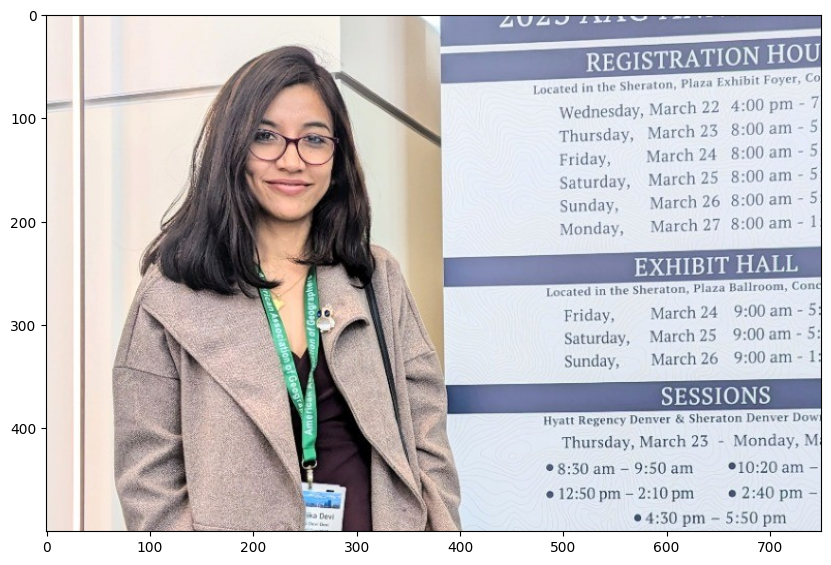

In [35]:
# Set zooming parameters
rcParams['figure.figsize'] = 10, 12
plt.imshow(image_cropped)

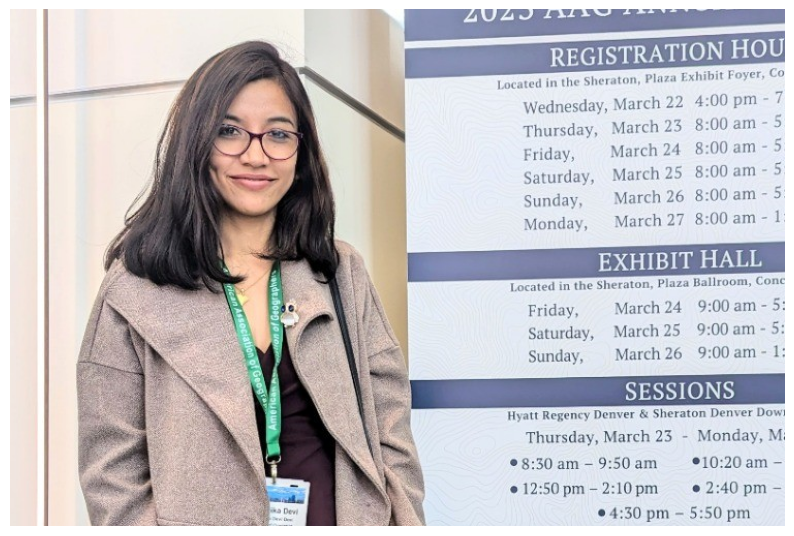

In [36]:
plt.axis("off")
plt.imshow(image_cropped)

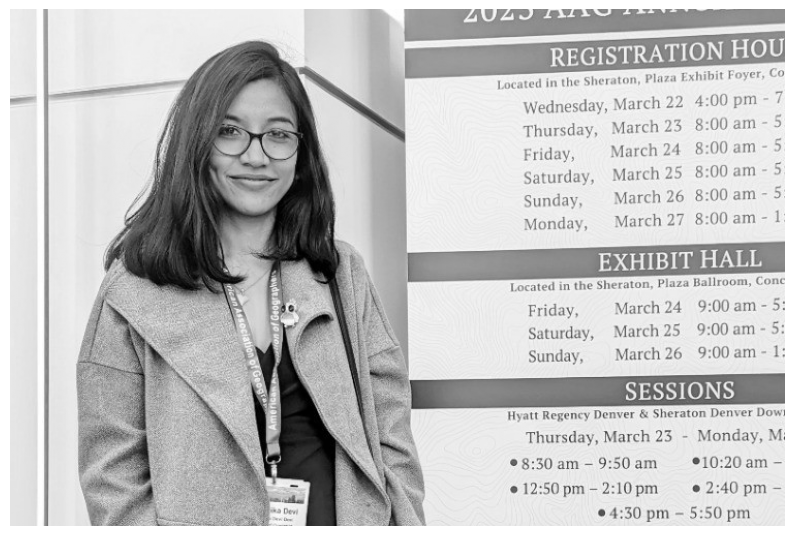

In [37]:
# convert image to Grayscale
image_gray = cv2.cvtColor(image_cropped, cv2.COLOR_BGR2GRAY)

# remove axes
plt.axis("off")
plt.imshow(image_gray, cmap = "gray")

In [38]:
# save face detection algorithm's url in haarcascade_url variable
haarcascade_url = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_alt2.xml"

# save face detection algorithm's name as haarcascade
haarcascade = "haarcascade_frontalface_alt2.xml"

# chech if file is in working directory
if (haarcascade in os.listdir(os.curdir)):
    print("File exists")
else:
    # download file from url and save locally as haarcascade_frontalface_alt2.xml
    urlreq.urlretrieve(haarcascade_url, haarcascade)
    print("File downloaded")

File exists


In [39]:
# create an instance of the Face Detection Cascade Classifier
detector = cv2.CascadeClassifier(haarcascade)

# Detect faces using the haarcascade classifier on the "grayscale image"
faces = detector.detectMultiScale(image_gray)

# Print coordinates of detected faces
print("Faces:\n", faces)

Faces:
 [[182  79 111 111]]


Text(0.5, 1.0, 'Face Detection')

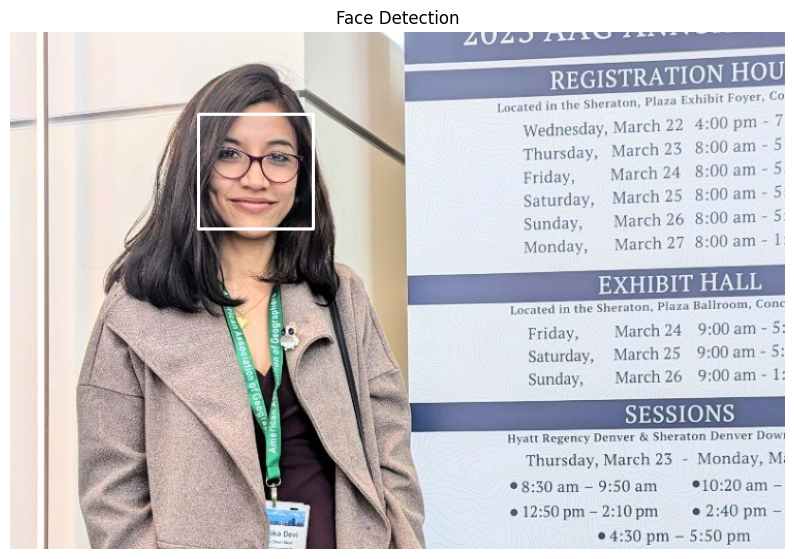

In [40]:
for face in faces:
#     save the coordinates in x, y, w, d variables
    (x,y,w,d) = face
    # Draw a white coloured rectangle around each face using the face's coordinates
    # on the "image_template" with the thickness of 2
    cv2.rectangle(image_template,(x,y),(x+w, y+d),(255, 255, 255), 2)

plt.axis("off")
plt.imshow(image_template)
plt.title('Face Detection')

In [41]:
# save facial landmark detection model's url in LBFmodel_url variable
LBFmodel_url = "https://github.com/kurnianggoro/GSOC2017/raw/master/data/lbfmodel.yaml"

# save facial landmark detection model's name as LBFmodel
LBFmodel = "LFBmodel.yaml"

# check if file is in working directory
if (LBFmodel in os.listdir(os.curdir)):
    print("File exists")
else:
    # download picture from url and save locally as lbfmodel.yaml
    urlreq.urlretrieve(LBFmodel_url, LBFmodel)
    print("File downloaded")

File exists


In [42]:
# create an instance of the Facial landmark Detector with the model
landmark_detector  = cv2.face.createFacemarkLBF()
landmark_detector.loadModel(LBFmodel)

# Detect landmarks on "image_gray"
_, landmarks = landmark_detector.fit(image_gray, faces)

# print coordinates of detected landmarks
print("landmarks LBF\n", landmarks)

landmarks LBF
 (array([[[188.76076 , 123.340996],
        [188.63495 , 135.7447  ],
        [189.3296  , 147.49869 ],
        [192.0936  , 159.93964 ],
        [196.90701 , 171.32477 ],
        [204.122   , 181.40028 ],
        [213.24055 , 189.92003 ],
        [223.68648 , 196.50282 ],
        [235.39731 , 198.43758 ],
        [246.73953 , 197.112   ],
        [256.1838  , 190.85455 ],
        [264.5883  , 182.63316 ],
        [271.39764 , 173.15144 ],
        [275.85403 , 162.21654 ],
        [278.37012 , 150.91446 ],
        [279.61002 , 139.67091 ],
        [279.8028  , 127.452644],
        [197.06857 , 107.89765 ],
        [203.61473 , 102.923584],
        [212.42099 , 102.432915],
        [220.75304 , 104.31368 ],
        [228.54996 , 107.413635],
        [246.47409 , 107.72887 ],
        [253.98122 , 105.197945],
        [262.49817 , 104.67214 ],
        [270.73572 , 106.52691 ],
        [275.73798 , 112.08088 ],
        [237.56206 , 119.34181 ],
        [237.50148 , 128.65045 ]

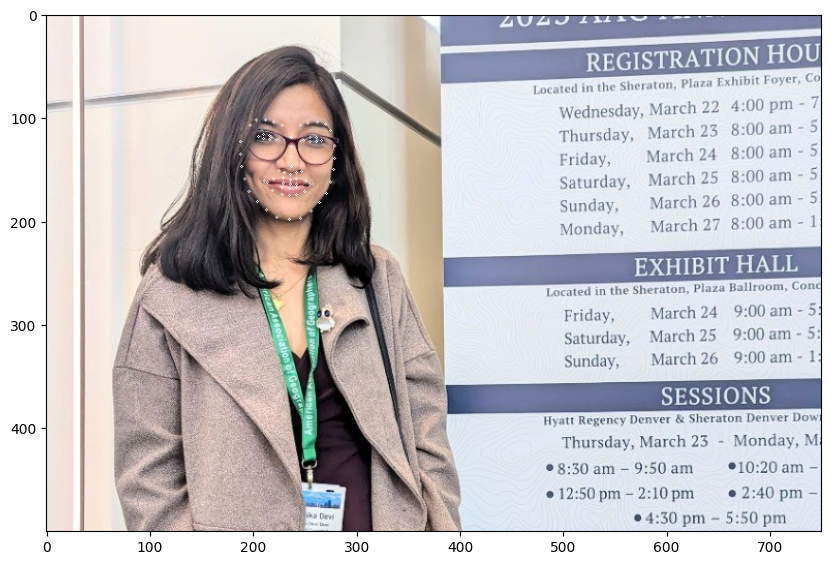

In [43]:
for landmark in landmarks:
    for x,y in landmark[0]:
        # display landmarks on "image_cropped"
        # with white colour in BGR and thickness 1
        cv2.circle(image_cropped, (int(x), int(y)), 1, (255, 255, 255), 1)
# plt.axis("off")
plt.imshow(image_cropped)

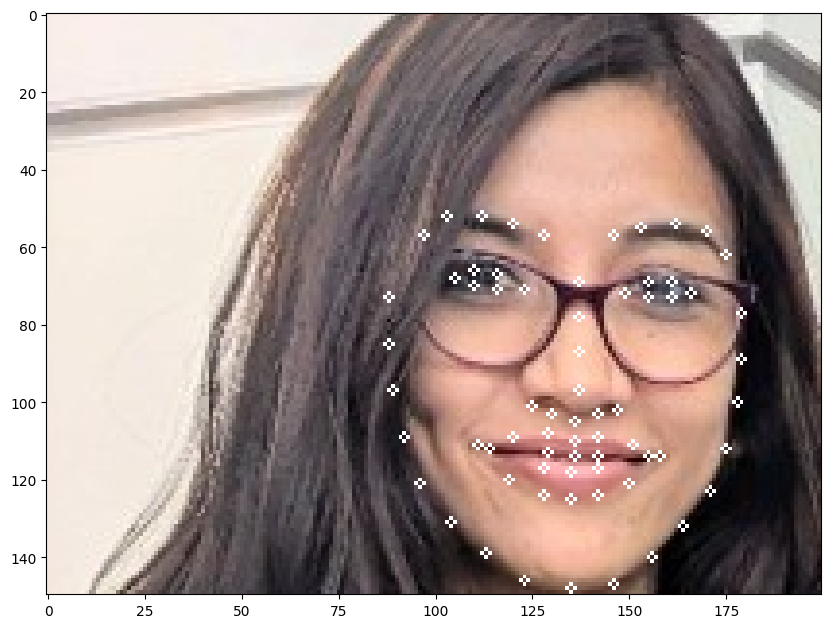

In [47]:
# set cropped image
x, y, width, depth = 100, 50, 200, 150
image_cropped3 = image_cropped[y:(y+depth), x:(x+width)]

plt.imshow(image_cropped3)